本章主要聚焦于聚类分析，它是一种无监督学习技术。其目的在于在数据中找到一个自然的分组，以便使同一簇(clustering)中的样本具有相同的模式，即更加相似。

#### 使用K-means方法按照相似度对对象进行分组

##### 使用sklearn进行k-means聚类

K-means算法属于基于原型的聚类方法(prototype-base clusting.) 本小节还将讨论另外两种聚类方法，`分层聚类和基于密度的聚类`。

* 其中，基于原型的聚类意味着每一个簇(cluster)都由一个原型(prototype)表示, 原型通常是具有连续特征的相似点的质心(centroid)(或者说均值)， 又或者是在类别型特征情况下的中心点(medoid)(最具有代表性的点或者是到当前簇内所有其他点距离最小化的点.) `这种聚类方法的缺点之一是必须人为指定聚类个数K`.

以下是一个使用K-means方法进行二维数据聚类的示例：

* Step1: 从样本中随机挑选$k$个质心(centroids)作为初始聚类中心；
* Step2: 将每个样本分配给最近的质心$\mu^{(j)}$， $j\in{1, ..., k}$;
* Step3: 将质心移动到分配给他的示例的中心；
* Step4: 重复步骤2、3直到质心不再改变或者达到用户定义的容差(tolerance)或者最大迭代次数；

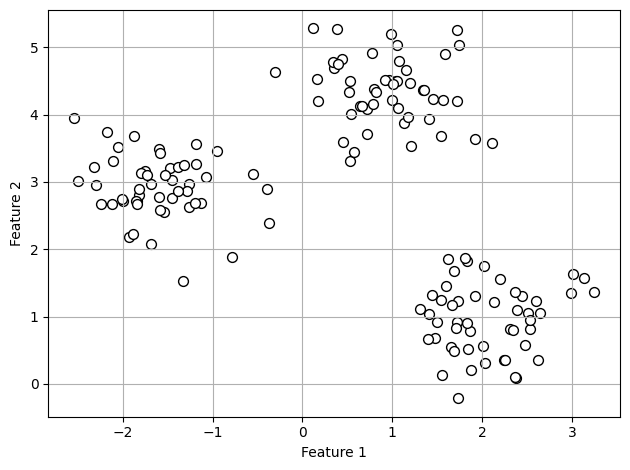

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c='white', 
            marker='o', 
            edgecolors='black', 
            s=50)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

所以，衡量上述提到的最相似或最近，常用的criteria是欧式距离(平方)：

$$d(\boldsymbol{x},\boldsymbol{y})^2=\sum_{j=1}^m\bigl(x_j-y_j\bigr)^2=\Vert \boldsymbol x-\boldsymbol y\Vert_2^2$$

所以，根据上述欧氏距离指标，可以将$k$均值算法视为一个优化问题，即一种最小化簇内误差平方和的迭代方法(有时候也称为cluster inertia)：

$$SSE=\sum_{i=1}^n\sum_{j=1}^kw^{(i,j)}\left\|\boldsymbol x^{(i)}-\boldsymbol \mu^{(j)}\right\|_2^2$$

其中，$\boldsymbol{\mu}^{(j)}$代表第$j$个质心(centroid). $w^{(i,j)}=1$,则对应说明样本$\boldsymbol x^{(i)}$属于第$j$个簇，否则为0：

$$w^{(i,j)}=\begin{cases}1,&\text{if}\quad \boldsymbol x^{(i)}\in j\\0,&\text{otherwise}\end{cases}$$

In [2]:
# 使用sklearn实现.
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10,      # 独立运行K-means10次，使用不同的随机质心来选择具有最低SSE的模型.
            max_iter=300, 
            tol=1e-04,      # 容差参数.
            random_state=0)
y_km = km.fit_predict(X)

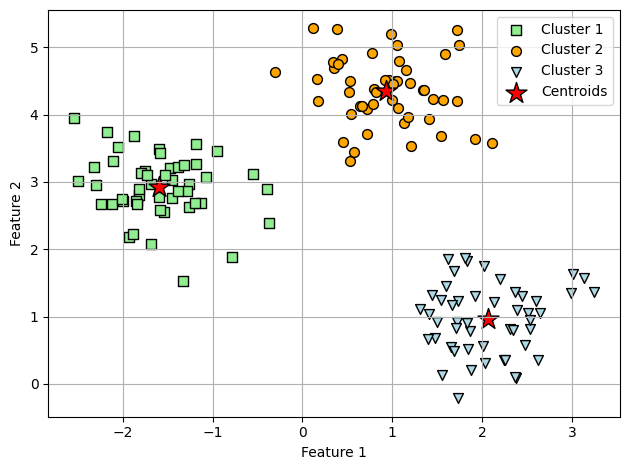

In [3]:
# 可视化聚类结果.
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.savefig('../Python-MachineLearning/Attached_images/Chapter10/figures/10_02.png', dpi=600)
plt.show()

#### 使用K-means++更好地初始化聚类质心

在上述方法中，K-Means方法需要认为预先指定$K$的值，同时需要假设数据呈球形结构。  如果初始质心选择不当，会导致聚类效果不佳或者收敛速度很慢，解决此问题的一种方法是在数据集上多次运行K-Means方法，并根据SSE来选择最佳模型。

另一种方法就是使用[K-Means++算法](https://dl.acm.org/doi/10.5555/1283383.1283494).其步骤可以总结如下：

* Step1: 初始化一个空集合$\boldsymbol{M}$, 用来存储选出来的$k$个质心；
* Step2: 随机选择第一个质心$\boldsymbol{\mu}^{(j)}$, 并将其放入到集合$\boldsymbol{M}$;
* Step3: 对于不在$\boldsymbol{M}$中的每个样本$\boldsymbol{x}^{(i)}$, 计算它到$\boldsymbol{M}$中任意质心的最小平方距离$d(\boldsymbol{x}^{(i)},\boldsymbol{M})^{2}$;
* Step4: 使用加权概率分布$\frac{d\left(\boldsymbol \mu^{(p)},\boldsymbol{M}\right)^{2}}{\sum_{i}d\left(\boldsymbol x^{(i)},\boldsymbol{M}\right)^{2}}.$随机选择下一个质心$\boldsymbol{\mu}^{(p)}$;
* Step5: 重复上述步骤3,4，直到选出$k$个质心;
* Step6: 然后执行传统的K-means算法.

In [4]:
help(km)

"""
init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
"""

Help on KMeans in module sklearn.cluster._kmeans object:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |      For an example of how to choose an optimal value for `n_clusters` refer to
 |      :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to 

"\ninit : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'\n"

#### 硬聚类和软聚类

* `硬聚类`：数据集中的每个样本都仅分配给一个簇，例如之前的K-means和K-Means++;
* `软聚类`: 有时候也称为模糊聚类(fuzzy clustering), 将一个样本分配给一个或多个簇，常见示例是模糊C均值算法(FCM).

在K-means中，可以使用二进制值的稀疏向量来表示样本$x$的簇成员身份，$$\begin{bmatrix}x\in\mu^{(1)}&\to&w^{(i,j)}=0\\x\in\mu^{(2)}&\to&w^{(i,j)}=1\\x\in\mu^{(3)}&\to&w^{(i,j)}=0\end{bmatrix}$$

FCM算法与K-Means过程类似，但相较于硬聚类，这里用每个样本属于每个簇的概率来进行分簇. 相较之下，FCM的簇成员向量可以表示为：$$\begin{bmatrix}x\in\mu^{(1)}&\to&w^{(i,j)}=0.1\\x\in\mu^{(2)}&\to&w^{(i,j)}=0.85\\x\in\mu^{(3)}&\to&w^{(i,j)}=0.05\end{bmatrix}$$

可以将FCM算法总结为四个步骤：

* Step1: 指定质心的数量$k$并随机分配每个样本点的簇成员资格；
* Step2: 计算质心，$\boldsymbol\mu^{(j)},j\in\{1,...,k\}$；
* Step3: 更新每个样本的簇成员资格;
* Step4: 重复步骤2,3直到成员系数不变或者达到用户定义的容差(tolerance)或者最大迭代数量.

FCM的目标函数如下：

$$J_m=\sum_{i=1}^n\sum_{j=1}^kw^{(i,j)^m}\|\boldsymbol x^{(i)}-\boldsymbol  \mu^{(j)}\|_2^2$$

在上式中，$w^{(i,j)}$不再与K-means一样取值为0或1, 相反，他是一个概率值$w^{(i,j)}\in [0, 1]$, 代表样本属于某个簇的概率. 同时，指数$m$(大于或等于1， 通常取值为2)被称为`模糊系数(fuzziness coefficient)`,用于控制模糊程度.

簇成员概率计算过程如下：

$$w^{(i,j)}=\left[\sum_{c=1}^k\left(\frac{\left\|\boldsymbol x^{(i)}-\boldsymbol  \mu^{(j)}\right\|_2}{\|\boldsymbol  x^{(i)}-\boldsymbol \mu^{(c)}\|_2}\right)^{\frac{2}{m-1}}\right]^{-1}$$

例如，如果选择有3个簇，则计算样本$\boldsymbol{x^{(i)}}$属于$\boldsymbol{\mu}^{(j)}$的概率如下：

$$w^{(i,j)}=\left[\left(\frac{\left\|\boldsymbol x^{(i)}-\boldsymbol \mu^{(j)}\right\|_2}{\left\|\boldsymbol x^{(i)}-\boldsymbol \mu^{(1)}\right\|_2}\right)^{\frac{2}{m-1}}+\left(\frac{\left\|\boldsymbol x^{(i)}-\boldsymbol \mu^{(j)}\right\|_2}{\left\|\boldsymbol x^{(i)}-\boldsymbol \mu^{(2)}\right\|_2}\right)^{\frac{2}{m-1}}+\left(\frac{\left\|\boldsymbol x^{(i)}-\boldsymbol \mu^{(j)}\right\|_2}{\left\|\boldsymbol x^{(i)}-\boldsymbol \mu^{(3)}\right\|_2}\right)^{\frac{2}{m-1}}\right]^{-1}$$

其中，$\boldsymbol \mu^{(j)}$计算如下：

$$\mu^{(j)}=\frac{\sum_{i=1}^nw^{(i,j)^m}\boldsymbol x^{(i)}}{\sum_{i=1}^nw^{(i,j)^m}}$$

#### 使用手肘法寻找最佳聚类数量

为了量化聚类质量，这里需要使用内在指标(intrinsic metrics), 例如簇内SSE(distortion)来比较不同$k$取值情况下的聚类效果；

In [5]:
# 获取簇内SSE.
print(f'Distortion: {km.inertia_: .2f}')

Distortion:  72.48


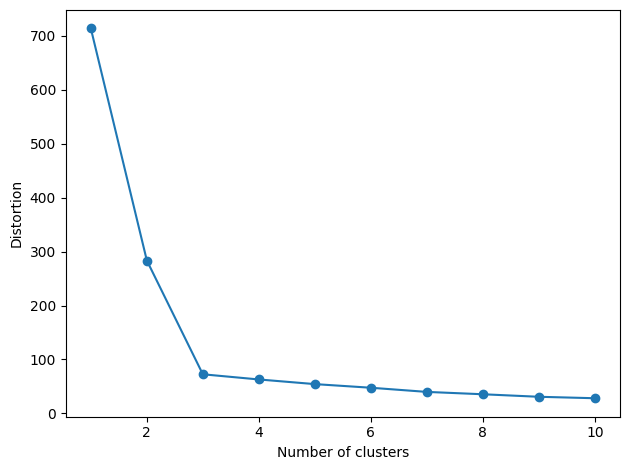

In [6]:
# 手肘法找K.
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

所以，从上图中可以看出$k=3$的时候，是比较好的选择.

#### 使用轮廓图量化聚类质量

轮廓图(silhouette plots)可以用作图形工具，来绘制簇中样本的紧密程度. 要计算数据集中单个样本的轮廓系数，步骤如下：

* Step1: 计算聚类凝聚力(cluster cohesion)$a^{(i)}$, 具体为样本$\boldsymbol{x}^{(i)}$与同一簇中所有其它点之间的平均距离；
* Step2: 计算聚类分散度(cluster separation)$b^{(i)}$, 具体为样本$\boldsymbol{x}^{(i)}$与最近的簇中所有示例之间的平均距离；
* Step3: 计算轮廓系数$s^{(i)}$, 具体为凝聚力和分散度之间的差异除以二者中的较大值, 如下：$$s^{(i)}=\frac{b^{(i)}-a^{(i)}}{max\{b^{(i)},a^{(i)}\}}$$

轮廓系数的取值在正负一之间，如果聚类凝聚力和分散度相等，则轮廓系数为0， 如果$b^{(i)}>>a^{(i)}$, 则可能接近理想的轮廓系数1， 因为$b^{(i)}$量化了一个样本与其他簇之间的差异程度， 而$a^{(i)}$高速我们它与自身所在簇中其它样本点相似程度.

下面是代码的逐行解释：

```python
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
```
- 导入必要的库：
  - `numpy` 用于数值计算。
  - `matplotlib.cm` 用于获取颜色映射。
  - `silhouette_samples` 从 `sklearn.metrics` 中导入，用于计算每个数据点的轮廓系数。

```python
cluster_labels = np.unique(y_km)
```
- `y_km` 是聚类标签的数组。使用 `np.unique()` 获取唯一的聚类标签（即每个聚类的标识），并将其存储在 `cluster_labels` 中。

```python
n_clusters = cluster_labels.shape[0]
```
- 计算聚类的数量 `n_clusters`，即 `cluster_labels` 的长度。

```python
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
```
- 计算每个数据点的轮廓系数，使用 `silhouette_samples()` 函数，输入为数据点 `X`、聚类标签 `y_km` 和距离度量（这里使用欧几里得距离）。

```python
y_ax_lower, y_ax_upper = 0, 0
yticks = []
```
- 初始化变量：
  - `y_ax_lower` 和 `y_ax_upper` 用于绘图的 y 轴边界。
  - `yticks` 用于存储 y 轴刻度的位置。

```python
for i, c in enumerate(cluster_labels):
```
- 遍历每个聚类标签 `c`，同时获取其索引 `i`。

```python
    c_silhouette_vals = silhouette_vals[y_km == c]
```
- 获取属于当前聚类 `c` 的所有数据点的轮廓系数。

```python
    c_silhouette_vals.sort()
```
- 对当前聚类的轮廓系数进行排序，以便更好地可视化。

```python
    y_ax_upper += len(c_silhouette_vals)
```
- 更新 y 轴的上边界，增加当前聚类中数据点的数量。

```python
    color = cm.jet(float(i) / n_clusters)
```
- 使用颜色映射 `cm.jet` 生成当前聚类的颜色，颜色根据聚类的索引 `i` 和总聚类数 `n_clusters` 进行计算。

```python
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_vals, 
             height=1.0, 
             edgecolor='none', 
             color=color)
```
- 为当前聚类绘制水平条形图：
  - y 轴范围根据 `y_ax_lower` 和 `y_ax_upper` 指定，
  - `c_silhouette_vals` 是条形图的高度（轮廓系数），
  - `height=1.0` 指定条形的高度，
  - `edgecolor='none'` 表示条形没有边框，
  - `color=color` 为条形指定颜色。

```python
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
```
- 计算并存储当前聚类的 y 轴刻度位置，这里取当前聚类的上下边界的中间值。

```python
    y_ax_lower += len(c_silhouette_vals)
```
- 更新 y 轴下边界，为下一个聚类做准备，增加当前聚类中数据点的数量。

```python
silhouette_avg = np.mean(silhouette_vals)
```
- 计算所有数据点的平均轮廓系数 `silhouette_avg`。

```python
plt.axvline(silhouette_avg, 
            color='red', 
            linestyle='--')
```
- 在图中绘制一条垂直线，表示平均轮廓系数的位置，线的颜色为红色，样式为虚线。

```python
plt.yticks(yticks, cluster_labels + 1)
```
- 设置 y 轴刻度和标签，`yticks` 为位置，`cluster_labels + 1` 为相应的聚类标签（加1是为了从1开始显示，因为聚类标签从0开始）。

```python
plt.ylabel('Cluster')
```
- 设置 y 轴标签为“Cluster”。

```python
plt.xlabel('Silhouette coefficient')
```
- 设置 x 轴标签为“Silhouette coefficient”（轮廓系数）。

```python
plt.tight_layout()
```
- 调整图形的布局，以避免标签与数据重叠。

```python
plt.show()
```
  

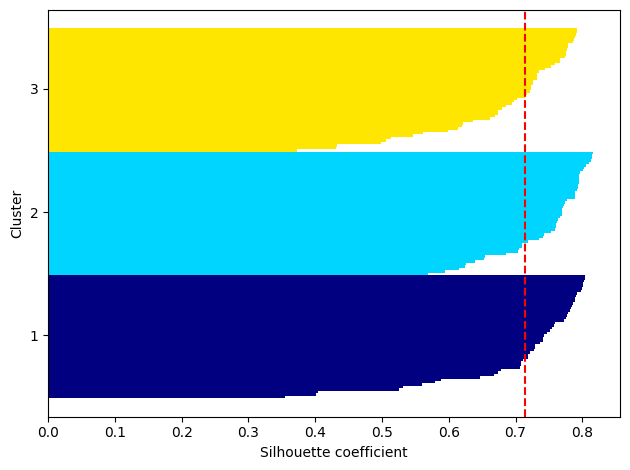

In [9]:
# 绘制k=3时对应的轮廓图.
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300, 
            tol=1e-4, 
            random_state=0)

y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_vals, 
             height=1.0, 
             edgecolor='none', 
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, 
            color='red', 
            linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

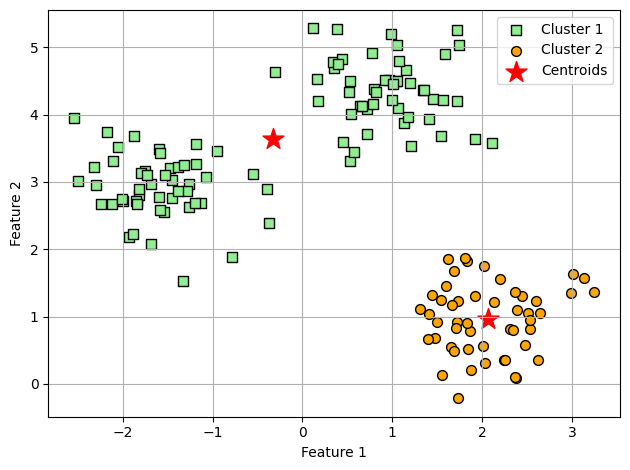

In [11]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

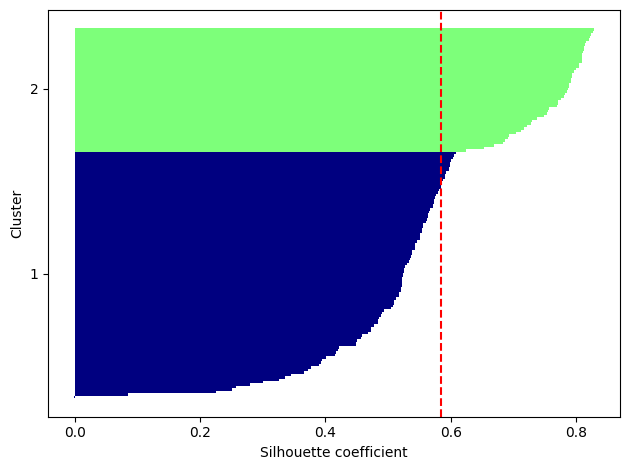

In [10]:
# 将对应的簇个数修改为2, 用于对比.
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300, 
            tol=1e-4, 
            random_state=0)

y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_vals, 
             height=1.0, 
             edgecolor='none', 
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, 
            color='red', 
            linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

如上图，轮廓长度和宽度明显不同，这表明聚类相对较差.